In [29]:
from utlis import *
import matplotlib as mlt
import matplotlib.pyplot as plt 
import numpy as np
import sudukoSolver



In [30]:
import tensorflow
tensorflow.keras.backend.clear_session()

(450, 450, 3)


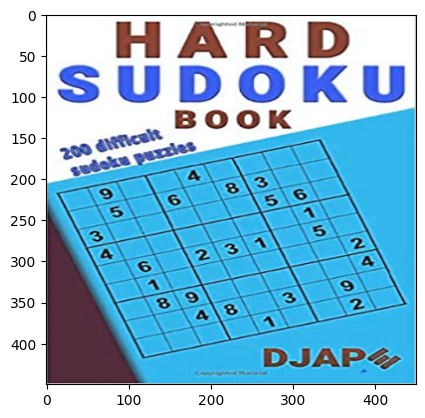

In [31]:
pathImage = "Resources/6.jpg"  
img = cv2.imread(pathImage)
plt.imshow(img)
img = cv2.resize(img,(450,450))
plt.imshow(img)
print(img.shape)

In [32]:
model = load_model("model.h5")
print(model.summary())
print("model input shape: ",model.input_shape)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 30)          0

The output (None, 32, 32, 1) indicates that the model expects images with a height and width of 32 pixels and a single color channel.

(450, 450)

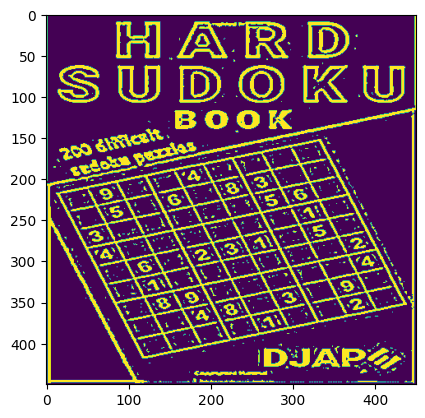

In [33]:
imgThreshold = preProcess(img)
imgThreshold.shape


contours (array([[[427, 447]],

       [[428, 447]]], dtype=int32), array([[[424, 447]],

       [[425, 447]]], dtype=int32), array([[[421, 447]],

       [[422, 447]]], dtype=int32), array([[[418, 447]],

       [[419, 447]]], dtype=int32), array([[[415, 447]],

       [[416, 447]]], dtype=int32), array([[[371, 447]],

       [[373, 447]]], dtype=int32), array([[[358, 447]],

       [[359, 447]]], dtype=int32), array([[[355, 447]],

       [[356, 447]]], dtype=int32), array([[[352, 447]],

       [[353, 447]]], dtype=int32), array([[[349, 447]],

       [[350, 447]]], dtype=int32), array([[[346, 447]],

       [[347, 447]]], dtype=int32), array([[[343, 447]],

       [[344, 447]]], dtype=int32), array([[[335, 447]],

       [[336, 447]]], dtype=int32), array([[[332, 447]],

       [[333, 447]]], dtype=int32), array([[[329, 447]],

       [[330, 447]]], dtype=int32), array([[[326, 447]],

       [[327, 447]]], dtype=int32), array([[[323, 447]],

       [[324, 447]]], dtype=int32), arra

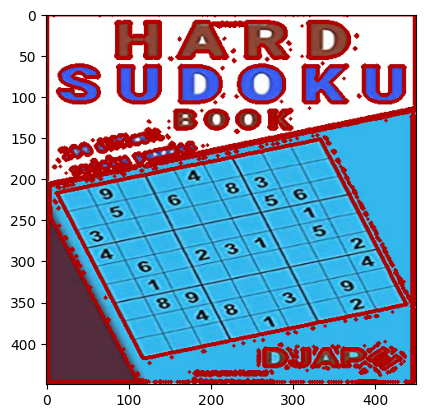

In [34]:
imgContours = img.copy() 
imgBigContour = img.copy() 
contours, hierarchy = cv2.findContours(imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # FIND ALL CONTOURS
print("contours",contours,"\nhierarchy",hierarchy)
cv2.drawContours(imgContours, contours, -1, (178, 0, 0), 3) 
plt.imshow(imgContours)

In [35]:
biggest, maxArea = biggestContour(contours)
print(biggest)


[[[334 152]]

 [[ 12 217]]

 [[117 418]]

 [[438 353]]]


In [36]:
biggest = reorder(biggest)
print("biggest",biggest)

biggest [[[ 12 217]]

 [[334 152]]

 [[117 418]]

 [[438 353]]]


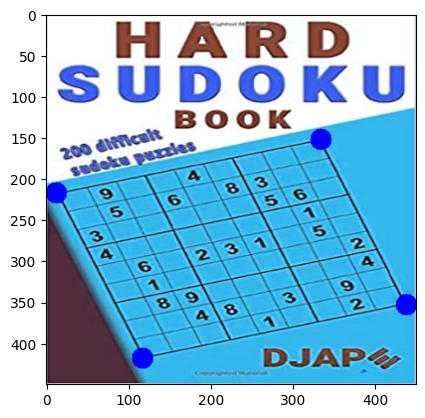

In [37]:
cv2.drawContours(imgBigContour, biggest, -1, (0, 0, 255), 25) 
plt.imshow(imgBigContour)

In [38]:
heightImg = 450
widthImg = 450
print(heightImg,widthImg)

450 450


In [39]:
pts1 = np.float32(biggest) # PREPARE POINTS FOR WARP
pts2 = np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]]) # PREPARE POINTS FOR WARP
print("pts1",pts1,"pts2",pts2)

pts1 [[[ 12. 217.]]

 [[334. 152.]]

 [[117. 418.]]

 [[438. 353.]]] pts2 [[  0.   0.]
 [450.   0.]
 [  0. 450.]
 [450. 450.]]


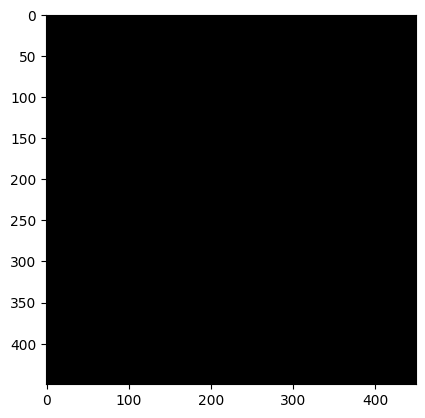

In [40]:
imgBlank = np.zeros((heightImg, widthImg, 3), np.uint8)
imgBlank.shape
plt.imshow(imgBlank)

[[ 1.25988060e+00 -6.58146580e-01  1.27699241e+02]
 [ 4.06648918e-01  2.01447618e+00 -4.42021118e+02]
 [-5.10120887e-06 -1.12895967e-05  1.00000000e+00]]


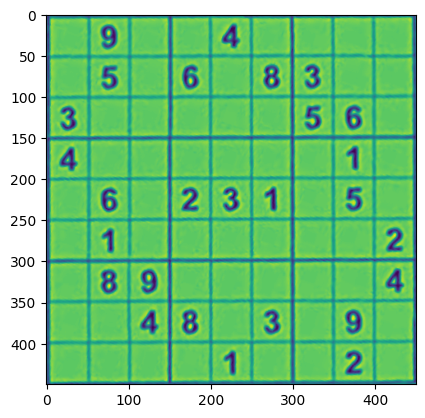

In [41]:
matrix = cv2.getPerspectiveTransform(pts1, pts2) # GER
imgWarpColored = cv2.warpPerspective(img, matrix, (widthImg, heightImg))
imgDetectedDigits = imgBlank.copy()
imgWarpColored = cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)
plt.imshow(imgWarpColored)
print(matrix)


81


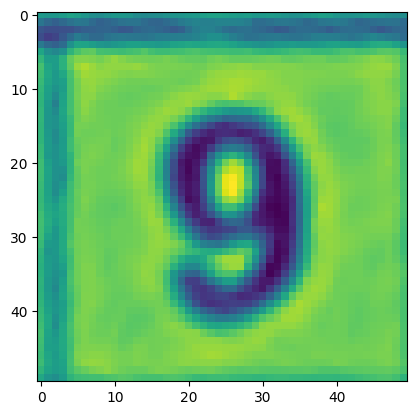

In [42]:

boxes = splitBoxes(imgWarpColored)
print(len(boxes))
plt.imshow(boxes[1])

In [43]:
numbers = getPredection(boxes,model)

2023-07-11 10:40:43.537592: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [44]:
for i in range(9):
        row = numbers[i * 9: (i + 1) * 9]
        print(row)


[0, 9, 0, 0, 4, 0, 0, 0, 0]
[0, 5, 0, 6, 0, 8, 3, 0, 0]
[3, 0, 0, 0, 0, 0, 5, 6, 0]
[4, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 6, 0, 2, 3, 1, 0, 5, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 2]
[0, 8, 9, 0, 0, 0, 0, 0, 4]
[0, 0, 4, 8, 0, 3, 0, 9, 0]
[0, 0, 0, 0, 1, 0, 0, 2, 0]


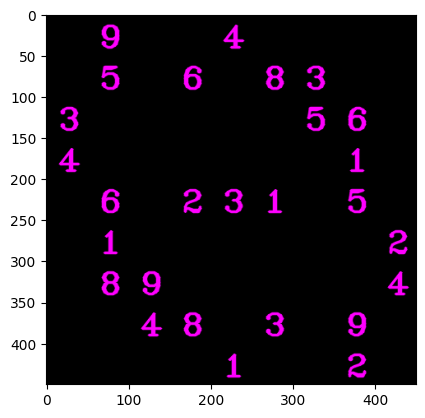

In [45]:
imgDetectedDigits = imgBlank.copy()
imgDetectedDigits = displayNumbers(imgDetectedDigits, numbers, color=(255, 0, 255))

In [46]:
numbers = np.asarray(numbers)
posArray = np.where(numbers > 0, 0, 1)
print(numbers)
print(posArray)


[0 9 0 0 4 0 0 0 0 0 5 0 6 0 8 3 0 0 3 0 0 0 0 0 5 6 0 4 0 0 0 0 0 0 1 0 0
 6 0 2 3 1 0 5 0 0 1 0 0 0 0 0 0 2 0 8 9 0 0 0 0 0 4 0 0 4 8 0 3 0 9 0 0 0
 0 0 1 0 0 2 0]
[1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1
 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1
 1 1 0 1 1 0 1]


In [47]:
board = np.array_split(numbers,9)
print(board)


[array([0, 9, 0, 0, 4, 0, 0, 0, 0]), array([0, 5, 0, 6, 0, 8, 3, 0, 0]), array([3, 0, 0, 0, 0, 0, 5, 6, 0]), array([4, 0, 0, 0, 0, 0, 0, 1, 0]), array([0, 6, 0, 2, 3, 1, 0, 5, 0]), array([0, 1, 0, 0, 0, 0, 0, 0, 2]), array([0, 8, 9, 0, 0, 0, 0, 0, 4]), array([0, 0, 4, 8, 0, 3, 0, 9, 0]), array([0, 0, 0, 0, 1, 0, 0, 2, 0])]


In [48]:
try:
        sudukoSolver.solve(board)
except:
        pass
print(board)

[array([8, 9, 6, 3, 4, 5, 2, 7, 1]), array([2, 5, 1, 6, 7, 8, 3, 4, 9]), array([3, 4, 7, 1, 2, 9, 5, 6, 8]), array([4, 7, 2, 5, 8, 6, 9, 1, 3]), array([9, 6, 8, 2, 3, 1, 4, 5, 7]), array([5, 1, 3, 4, 9, 7, 6, 8, 2]), array([6, 8, 9, 7, 5, 2, 1, 3, 4]), array([1, 2, 4, 8, 6, 3, 7, 9, 5]), array([7, 3, 5, 9, 1, 4, 8, 2, 6])]


In [49]:
flatList = []
for sublist in board:
    for item in sublist:
        flatList.append(item)

In [50]:
solvedNumbers =flatList*posArray
print(solvedNumbers)

[8 0 6 3 0 5 2 7 1 2 0 1 0 7 0 0 4 9 0 4 7 1 2 9 0 0 8 0 7 2 5 8 6 9 0 3 9
 0 8 0 0 0 4 0 7 5 0 3 4 9 7 6 8 0 6 0 0 7 5 2 1 3 0 1 2 0 0 6 0 7 0 5 7 3
 5 9 0 4 8 0 6]


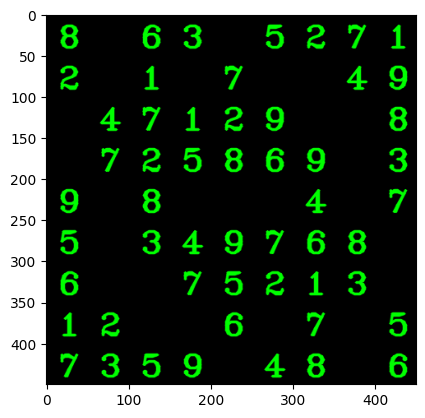

In [51]:
imgSolvedDigits = imgBlank.copy()
imgSolvedDigits= displayNumbers(imgSolvedDigits,solvedNumbers)


In [52]:
matrix = cv2.getPerspectiveTransform(pts2, pts1)
matrix

array([[ 7.16232376e-01,  2.34066488e-01,  1.20000000e+01],
       [-1.44136430e-01,  4.49285971e-01,  2.17000000e+02],
       [ 2.02640878e-06,  6.26627947e-06,  1.00000000e+00]])

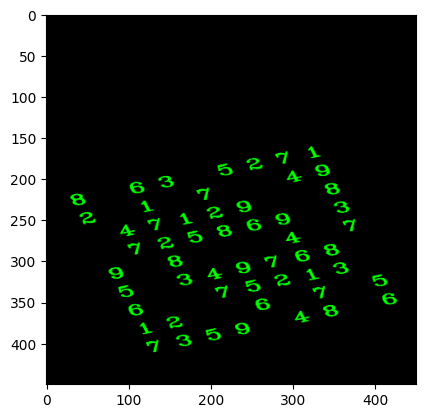

In [53]:
imgInvWarpColored = img.copy()
imgInvWarpColored = cv2.warpPerspective(imgSolvedDigits, matrix, (widthImg, heightImg))
plt.imshow(imgInvWarpColored)

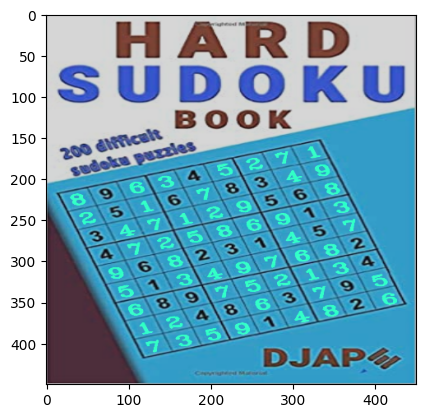

In [54]:
inv_perspective = cv2.addWeighted(imgInvWarpColored, 1, img, 0.8, 10)
plt.imshow(inv_perspective)
